In [1]:
#Libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imageio
import os
%matplotlib inline
#ignore harmless warnings
import warnings 
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("../csv-files/mid-gas-2017-2019.csv",index_col=[0], parse_dates=[0])
df.head(3)

,Price,Volume,Settlement Period,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,SAP,EU_ETS,Gas
datetime,,,,,,,,,,,,,,
2017-01-01 00:00:00,44.90,505.00,1,0.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0,16.95,1.033832,21.294832
2017-01-01 00:30:00,47.13,559.15,2,0.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0,16.95,1.033832,21.294832
2017-01-01 01:00:00,45.62,649.35,3,1.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0,16.95,1.033832,21.294832


In [3]:
df_INDO=pd.read_csv('../csv-files/INDO-2017-2019.csv',index_col=[0],parse_dates=[0])

df_INDO.head(3)

,Settlement_Period,INDO
datetime,,
2017-01-01 00:00:00,1,27239
2017-01-01 00:30:00,2,27814
2017-01-01 01:00:00,3,27453


In [4]:
df_ITSDO=pd.read_csv('../csv-files/ITSDO-2017-2019.csv',index_col=[0],parse_dates=[0])

df_ITSDO.head(3)

,Settlement Period,ITSDO
datetime,,
2017-01-01 00:00:00,1,27949
2017-01-01 00:30:00,2,28435
2017-01-01 01:00:00,3,28165


In [8]:
df=pd.merge(df,df_INDO['INDO'], how='inner', left_index=True, right_index=True)

In [9]:
df=pd.merge(df,df_ITSDO['ITSDO'], how='inner', left_index=True, right_index=True)

In [10]:
print(df.shape)
df.tail()


(43391, 16)


,Price,Volume,Settlement Period,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,SAP,EU_ETS,Gas,INDO,ITSDO
datetime,,,,,,,,,,,,,,,,
2019-07-01 21:30:00,55.31,1423.25,44,21.0,Mon,3.0,Jul,2019.0,182.0,1.0,27.0,9.05,4.338429,16.701429,27987,28498
2019-07-01 22:00:00,55.69,1429.55,45,22.0,Mon,3.0,Jul,2019.0,182.0,1.0,27.0,9.05,4.338429,16.701429,27380,27914
2019-07-01 22:30:00,46.23,1572.85,46,22.0,Mon,3.0,Jul,2019.0,182.0,1.0,27.0,9.05,4.338429,16.701429,26245,26760
2019-07-01 23:00:00,34.96,917.05,47,23.0,Mon,3.0,Jul,2019.0,182.0,1.0,27.0,9.05,4.338429,16.701429,24499,25015
2019-07-01 23:30:00,43.85,828.65,48,23.0,Mon,3.0,Jul,2019.0,182.0,1.0,27.0,9.05,4.338429,16.701429,22940,23452


In [10]:
#Exploratory Data Analysis
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Price,Volume,Settlement Period,hour,quarter,year,dayofyear,dayofmonth,weekofyear,SAP,EU_ETS,Gas,INDO,ITSDO
Price,1,0.170764,0.254346,0.254757,0.129036,0.105262,0.12706,-0.0196076,0.126961,0.60998,0.187125,0.622183,0.504496,0.495327
Volume,0.170764,1,0.517171,0.515865,-0.0332379,0.111798,-0.0325621,-0.0255877,-0.0318369,0.0412474,0.0763435,0.0551253,0.389849,0.364098
Settlement Period,0.254346,0.517171,1,0.999347,-0.00160304,0.00135438,-0.00135778,0.000690264,-0.00136079,0.000475607,0.000735156,0.00060595,0.468902,0.424307
hour,0.254757,0.515865,0.999347,1,-0.00158387,0.00134185,-0.00134014,0.000695934,-0.0013431,0.000426464,0.000730731,0.000558005,0.46932,0.424684
quarter,0.129036,-0.0332379,-0.00160304,-0.00158387,1,-0.290439,0.9673,0.0126524,0.956788,0.17756,0.0549731,0.181188,-0.156743,-0.147701
year,0.105262,0.111798,0.00135438,0.00134185,-0.290439,1,-0.282519,-0.00897423,-0.28111,0.00750488,0.900316,0.191672,-0.0202761,-0.0358059
dayofyear,0.12706,-0.0325621,-0.00135778,-0.00134014,0.9673,-0.282519,1,0.0960667,0.986441,0.179166,0.0729592,0.186412,-0.163689,-0.156328
dayofmonth,-0.0196076,-0.0255877,0.000690264,0.000695934,0.0126524,-0.00897423,0.0960667,1,0.0830318,-0.0544779,0.0279553,-0.0464094,-0.0391771,-0.03877
weekofyear,0.126961,-0.0318369,-0.00136079,-0.0013431,0.956788,-0.28111,0.986441,0.0830318,1,0.180045,0.0698079,0.186606,-0.160023,-0.152631
SAP,0.60998,0.0412474,0.000475607,0.000426464,0.17756,0.00750488,0.179166,-0.0544779,0.180045,1,0.106765,0.979025,0.186568,0.202223


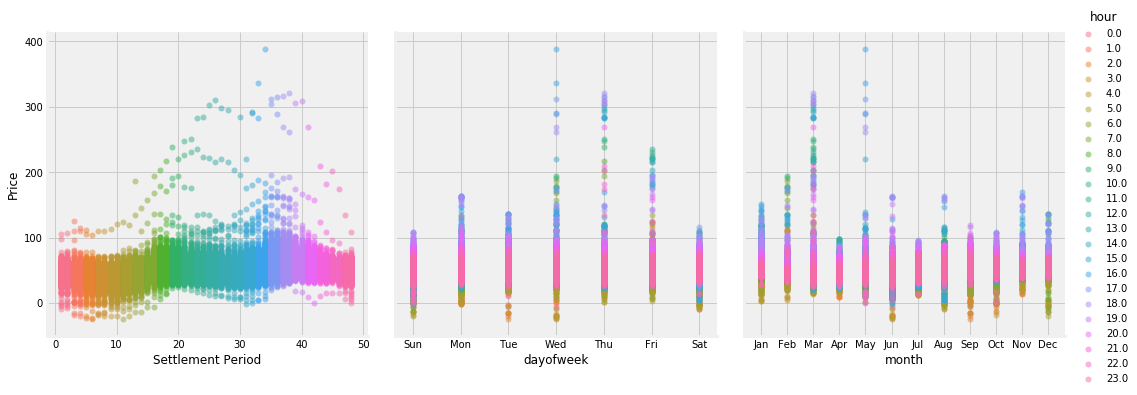

In [12]:
sns.pairplot(df,
             hue = 'hour',
             x_vars=['Settlement Period','dayofweek','month'],
             y_vars='Price',
             height=5,
             plot_kws={'alpha':0.5, 'linewidth':0}
            )
plt.show()

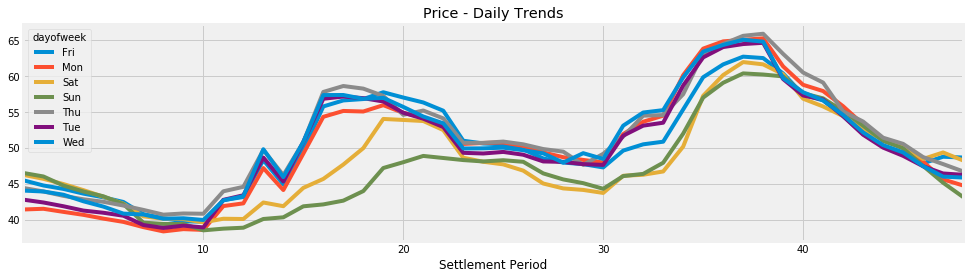

In [13]:
df.pivot_table(index=df['Settlement Period'], 
                     columns='dayofweek', 
                     values='Price',
                     aggfunc='mean').plot(figsize=(15,4),
                     title='Price - Daily Trends')
plt.show()

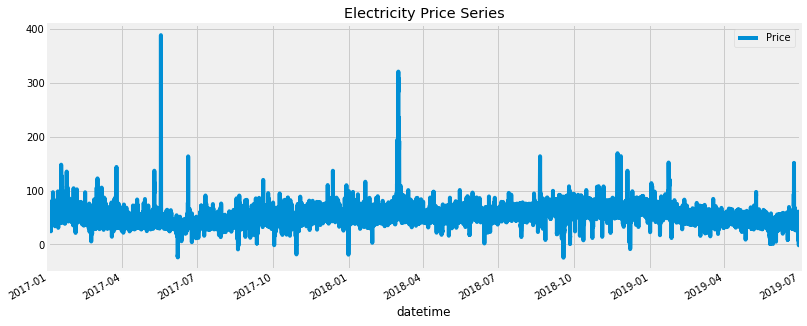

In [18]:
title = 'Electricity Price Series'
ylabel=''
xlabel=''

ax = df['Price'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)

[Text(0, 0.5, ''), Text(0.5, 0, '')]

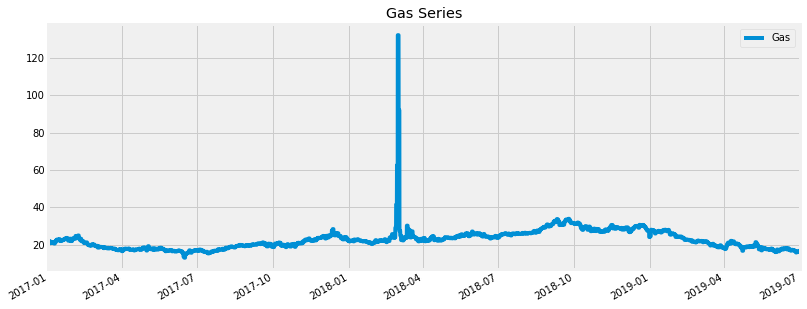

In [6]:
title = 'Gas Series'
ylabel=''
xlabel=''

ax = df['Gas'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
#df['Gas'].plot(legend=True);

[Text(0, 0.5, ''), Text(0.5, 0, '')]

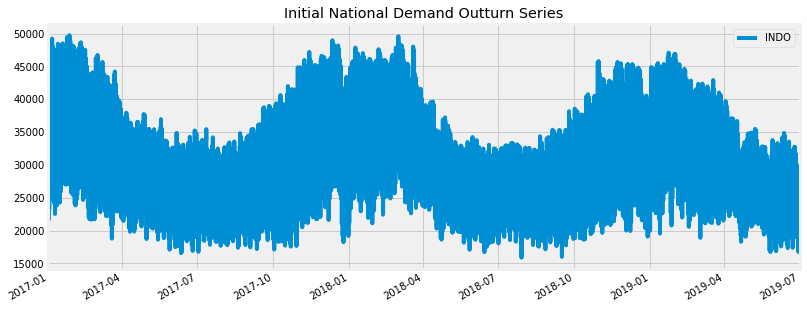

In [19]:
title = 'Initial National Demand Outturn Series'
ylabel=''
xlabel=''

ax = df['INDO'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

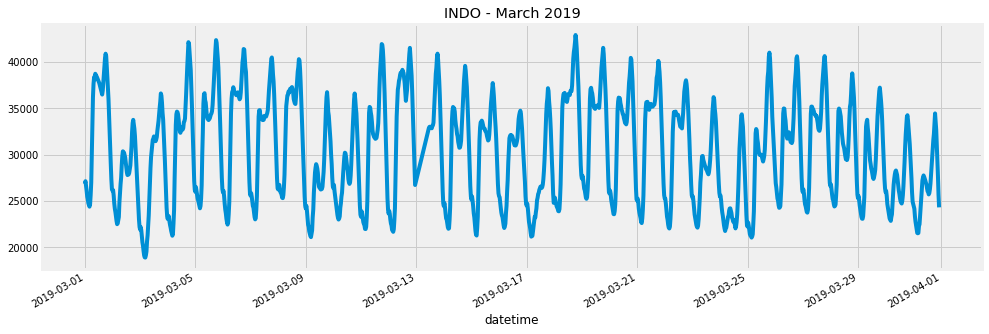

In [20]:
df['INDO'].loc[(df['INDO'].index >= '2019-03-01') &
               (df['INDO'].index < '2019-04-01')] \
    .plot(figsize=(15, 5), title = 'INDO - March 2019')

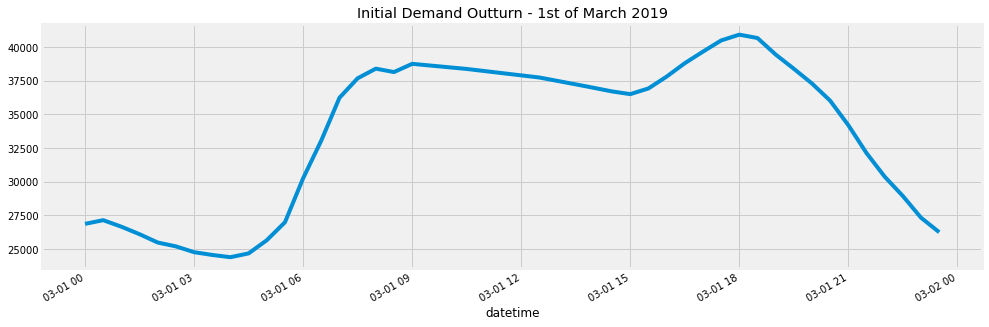

In [21]:
df['INDO'].loc[(df['INDO'].index >= '2019-03-01') &
               (df['INDO'].index < '2019-03-02')] \
    .plot(figsize=(15, 5), title = 'Initial Demand Outturn - 1st of March 2019')

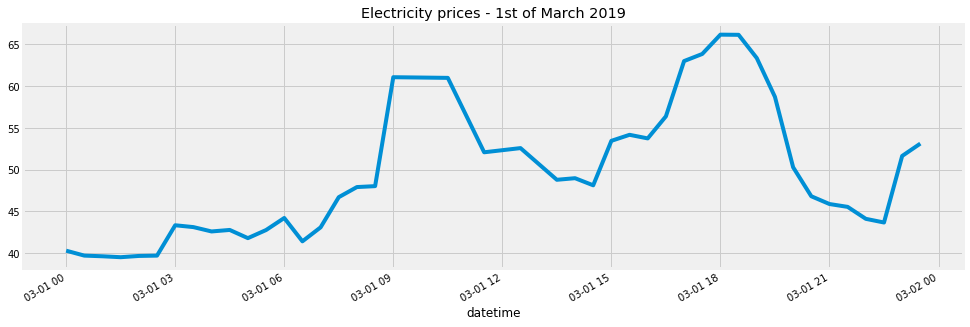

In [22]:
df['Price'].loc[(df['Price'].index >= '2019-03-01') &
               (df['Price'].index < '2019-03-02')] \
    .plot(figsize=(15, 5), title = 'Electricity prices - 1st of March 2019')